# Jumpman New Market Analysis

### Ye Yuan

In [1]:
import pandas as pd
import numpy as np
import geocoder

In [2]:
Jumpman23 = pd.read_csv("Analysis_me.csv")

In [3]:
Jumpman23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 27 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null float64
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
Date                                   5983 non-nu

In [4]:
Jumpman23.head(2)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,Time_of_day,date_the_Jumpman_arrived_at_pickup,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,0.01,...,afternoon,NaN,NaN,NaN,NaN,10/26/14,14:52:06,60,0,0
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,0.02,...,evening,10/16/14,10:26:02 PM,10/16/14,10:48:23 PM,10/16/14,22:59:23,60,22,11


Before importing data into python, I already have done some feature engineering in Excel. Below are my engineered features:
* Date: categorical variable, date of the order.
* Day_of_week: categorical variable, order's day of week.
* Time_of_day: categorical variable, time of the day when the delivery stared. 
    * Midnight: 12:00 am - 6:00 am; 
    * Morning: 6:00 am - 12:00 pm; 
    * Afternoon: 12:00 pm - 6:00 pm; 
    * Evening: 6:00 pm - 12:00 am.
* Minutes_from_ start_ to_deliver: continuous variable, minutes difference between time_the_Jumpman_arrived_at_dropoff and time_the_delivery_started.
* Minutes_in_pickup: continuous variable, minutes difference between time_the_Jumpman_left_pickup and time_the_Jumpman_arrived_at_pickup.
* Minutes_pickup_dropoff: continuous variable, minutes difference between time_the_Jumpman_arrived_at_dropoff and time_the_Jumpman_left_pickup

## Check Data Integrity

In [5]:
Jumpman23.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
Date                                      0
Day_of_week                               0
Time_the_delivery_started                 0
Time_of_day                               0
date_the_Jumpman_arrived_at_pickup      550
time_the_Jumpman_arrived_at_pickup      550
date_the_Jumpman_left_pickup            550
time_the_Jumpman_left_pickup            550
date_the_Jumpman_arrived_at_drop

#### Delivery_id is the primary key in this data set. There is no NA value in this column.

In [6]:
id_count = pd.DataFrame({'count':Jumpman23.groupby('delivery_id')['delivery_id'].count()}).reset_index()
dup_id = id_count[id_count['count']>1].delivery_id

In [7]:
dup_dat =Jumpman23[Jumpman23['delivery_id'].isin(dup_id)]

In [8]:
dup_dat=dup_dat.sort_values('delivery_id')

In [9]:
dup_dat.shape, len(set(dup_dat.delivery_id))

((1425, 27), 656)

#### There are 656 duplicated delivery_ids in the dataset. 1425 rows are involved in dupliation issues.This is a data integrity issue.  Let me look deeper into the duplicates to see the reason.

In [10]:
dup_dat.head(20)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,Time_of_day,date_the_Jumpman_arrived_at_pickup,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff
1008,1272701,81085,112646,bicycle,Mighty Quinn's BBQ,BBQ,Brisket,1.0,Meats,NaN,...,afternoon,10/1/14,12:17:23 PM,10/1/14,12:27:42 PM,10/1/14,12:34:27,22,10,6
5080,1272701,81085,112646,bicycle,Mighty Quinn's BBQ,BBQ,Housemade Iced Tea,1.0,Beverages,NaN,...,afternoon,10/1/14,12:17:23 PM,10/1/14,12:27:42 PM,10/1/14,12:34:27,22,10,6
2299,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Moroccan Cigars (5 pc),1.0,Appetizers,0.00,...,afternoon,10/1/14,5:40:33 PM,10/1/14,5:53:54 PM,10/1/14,18:09:37,43,13,15
2272,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Blue Lamoon Citrus blossom lemonade w/ Splenda,1.0,Beverages,0.00,...,afternoon,10/1/14,5:40:33 PM,10/1/14,5:53:54 PM,10/1/14,18:09:37,43,13,15
2986,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Watermelon,1.0,Desserts,0.00,...,afternoon,10/1/14,5:40:33 PM,10/1/14,5:53:54 PM,10/1/14,18:09:37,43,13,15
5386,1274328,255435,23359,bicycle,Lure Fishbar,Seafood,King Salmon,3.0,Sushi & Sashimi,0.01,...,afternoon,10/1/14,5:44:49 PM,10/1/14,6:21:09 PM,10/1/14,18:41:16,53,36,20
1588,1274328,255435,23359,bicycle,Lure Fishbar,Seafood,Big Eye Tuna,6.0,Sushi & Sashimi,0.01,...,afternoon,10/1/14,5:44:49 PM,10/1/14,6:21:09 PM,10/1/14,18:41:16,53,36,20
931,1274372,82041,133293,bicycle,Parm,Italian,Meatball Parm,1.0,Sandwiches,0.00,...,afternoon,10/1/14,5:57:34 PM,10/1/14,6:09:54 PM,10/1/14,18:20:06,22,12,10
4578,1274372,82041,133293,bicycle,Parm,Italian,Chicken Parm,1.0,Sandwiches,0.00,...,afternoon,10/1/14,5:57:34 PM,10/1/14,6:09:54 PM,10/1/14,18:20:06,22,12,10
2720,1274483,143721,119839,bicycle,Hummus Place,Middle Eastern,Hummus Mushrooms,1.0,Main,0.00,...,evening,10/1/14,6:24:23 PM,10/1/14,6:35:42 PM,10/1/14,18:46:42,24,11,11


One situation for duplicates is that every columns are the same. The other situation for duplicates is that there are multiple items are included in the order. Each item has its own item_name and item_name_category. But they have same delivery_id. 
Therefore, I decide to remove column item_name, item_quantity and item_name_category from the Jumpman dataset.

In [11]:
Jumpman = Jumpman23.drop(['item_name','item_quantity','item_category_name'],axis=1)

In [12]:
Jumpman.head(5)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,...,Time_of_day,date_the_Jumpman_arrived_at_pickup,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff
0,1457973,327168,162381,van,Melt Shop,American,0.01,40.744607,-73.990742,40.752073,...,afternoon,NaN,NaN,NaN,NaN,10/26/14,14:52:06,60,0,0
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,0.02,40.723080,-73.994615,40.719722,...,evening,10/16/14,10:26:02 PM,10/16/14,10:48:23 PM,10/16/14,22:59:23,60,22,11
2,1476547,83095,132725,bicycle,Bareburger,Burger,0.00,40.728478,-73.998392,40.728606,...,evening,10/28/14,9:37:19 PM,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,NaN,40.738868,-74.002747,40.751257,...,morning,10/30/14,11:04:18 AM,10/30/14,11:16:38 AM,10/30/14,11:32:38,38,12,16
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.00,40.726110,-74.002492,40.709323,...,midnight,10/10/14,12:14:43 AM,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23


In [13]:
Jumpman.shape

(5983, 24)

In [14]:
Jumpman = Jumpman.drop_duplicates(['delivery_id','customer_id','jumpman_id'],keep='first').reset_index()

In [15]:
Jumpman.shape # 5214 observations left after remove duplicates

(5214, 25)

In [16]:
# check if there is any duplicates left again
id_count1 = pd.DataFrame({'count':Jumpman.groupby('delivery_id')['delivery_id'].count()}).reset_index()
dup_id1 = id_count1[id_count1['count']>1].delivery_id
len(dup_id1)

0

### Feature Engineering: Zipcode

In [17]:
Jumpman.head(5)

,index,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,...,Time_of_day,date_the_Jumpman_arrived_at_pickup,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff
0,0,1457973,327168,162381,van,Melt Shop,American,0.01,40.744607,-73.990742,...,afternoon,NaN,NaN,NaN,NaN,10/26/14,14:52:06,60,0,0
1,1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,0.02,40.723080,-73.994615,...,evening,10/16/14,10:26:02 PM,10/16/14,10:48:23 PM,10/16/14,22:59:23,60,22,11
2,2,1476547,83095,132725,bicycle,Bareburger,Burger,0.00,40.728478,-73.998392,...,evening,10/28/14,9:37:19 PM,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5
3,3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,NaN,40.738868,-74.002747,...,morning,10/30/14,11:04:18 AM,10/30/14,11:16:38 AM,10/30/14,11:32:38,38,12,16
4,4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.00,40.726110,-74.002492,...,midnight,10/10/14,12:14:43 AM,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23


#### Use geocoder package with Google geocoding API to get zipcode of pickup and dropoff place. There are 2500 limits every day. So I will just comment these lines.

In [18]:
"""
pickup_zip = np.empty((len(Jumpman.delivery_id),))
for i in xrange(2527,2540):
    geo = geocoder.google([Jumpman['pickup_lat'].iloc[i],Jumpman['pickup_lon'].iloc[i]],method='reverse')
    pickup_zip[i] = geo.postal   
    print Jumpman['pickup_lat'].iloc[i],Jumpman['pickup_lon'].iloc[i], pickup_zip[i]
    """

"\npickup_zip = np.empty((len(Jumpman.delivery_id),))\nfor i in xrange(2527,2540):\n    geo = geocoder.google([Jumpman['pickup_lat'].iloc[i],Jumpman['pickup_lon'].iloc[i]],method='reverse')\n    pickup_zip[i] = geo.postal   \n    print Jumpman['pickup_lat'].iloc[i],Jumpman['pickup_lon'].iloc[i], pickup_zip[i]\n    "

In [19]:
# Jumpman.pickup_zip[:10]

In [20]:
"""
dropoff_zip = np.empty((len(Jumpman.delivery_id),))
for i in xrange(len(Jumpman.delivery_id)):
    geo = geocoder.google([Jumpman['dropoff_lat'].iloc[i],Jumpman['dropoff_lon'].iloc[i]],method='reverse')
    dropoff_zip[i] = geo.postal 
    print Jumpman['dropoff_lat'].iloc[i],Jumpman['dropoff_lon'].iloc[i], dropoff_zip[i]
    """

"\ndropoff_zip = np.empty((len(Jumpman.delivery_id),))\nfor i in xrange(len(Jumpman.delivery_id)):\n    geo = geocoder.google([Jumpman['dropoff_lat'].iloc[i],Jumpman['dropoff_lon'].iloc[i]],method='reverse')\n    dropoff_zip[i] = geo.postal \n    print Jumpman['dropoff_lat'].iloc[i],Jumpman['dropoff_lon'].iloc[i], dropoff_zip[i]\n    "

### Check NA again

In [21]:
Jumpman.isnull().sum()

index                                     0
delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          841
how_long_it_took_to_order              2635
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
Date                                      0
Day_of_week                               0
Time_the_delivery_started                 0
Time_of_day                               0
date_the_Jumpman_arrived_at_pickup      495
time_the_Jumpman_arrived_at_pickup      495
date_the_Jumpman_left_pickup            495
time_the_Jumpman_left_pickup            495
date_the_Jumpman_arrived_at_dropoff       0
time_the_Jumpman_arrived_at_dropoff       0
Minutes_from_start_to_deliver   

## Define Churn User

In [22]:
Jumpman['Date']=pd.to_datetime(Jumpman['Date'])

In [23]:
customer_list = list(set(Jumpman.customer_id))
len(customer_list) # there are 3192 customers in total

3192

In [24]:
customer_per_date = pd.DataFrame({'Num_customer': Jumpman.groupby('Date')['customer_id'].nunique()}).reset_index()

In [25]:
customer_per_date.head(2)

,Date,Num_customer
0,2014-10-01,157
1,2014-10-02,155


In [26]:
# add day_of_week column
customer_per_date['day_of_week'] = customer_per_date['Date'].dt.weekday_name

In [27]:
customer_per_date.head(2)

,Date,Num_customer,day_of_week
0,2014-10-01,157,Wednesday
1,2014-10-02,155,Thursday


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.factorplot(x="Date",y="Num_customer",data=customer_per_date,ax=ax)


According to the above plot, we can see daily customer numbers are not increasing smoothly. Let's take into deep look at customer retention problem. First, I need to define good user, who has more than 1 time order in the first two weeks.

In [29]:
customer_per_date.to_csv('customer_per_date.csv',index=False,encoding='utf-8')

In [30]:
# First, I need to find number of orders for each customer
orders_per_cus = pd.DataFrame({'num_orders_1':Jumpman[Jumpman.Date< '10/16/14'].groupby('customer_id')['delivery_id'].size(),
'num_orders_2': Jumpman[Jumpman.Date > '10/15/14'].groupby('customer_id')['delivery_id'].size()}).reset_index()

In [31]:
orders_per_cus.head(10)

,customer_id,num_orders_1,num_orders_2
0,242,1.0,NaN
1,641,NaN,1.0
2,1311,NaN,2.0
3,1517,1.0,NaN
4,2533,1.0,NaN
5,3253,1.0,NaN
6,4305,1.0,NaN
7,5056,1.0,NaN
8,5139,1.0,1.0
9,5444,1.0,NaN


In [32]:
orders_per_cus.isnull().sum()

customer_id        0
num_orders_1    1359
num_orders_2    1237
dtype: int64

In [33]:
orders_per_cus[orders_per_cus.num_orders_1.isnull()&orders_per_cus.num_orders_2.notnull()].shape
# there are 1359 new customers in the 2nd period

(1359, 3)

In [34]:
churn_customer = orders_per_cus['customer_id'].loc[orders_per_cus.num_orders_1.notnull()&orders_per_cus.num_orders_2.isnull()]
len(churn_customer)
# there are 1237 churn customers who had ordered only during 1st period

1237

In [35]:
orders_per_cus[orders_per_cus.num_orders_1.notnull()].shape
# there are 1833 customers during the 1st period

(1833, 3)

In [36]:
not_churn_customer = orders_per_cus['customer_id'].loc[orders_per_cus.num_orders_1.notnull()&orders_per_cus.num_orders_2.notnull()]

In [37]:
len(not_churn_customer)

596

In [38]:
customer_1st=churn_customer+not_churn_customer

In [39]:
retention_rate = len(not_churn_customer)*1.0/(len(customer_1st))

In [40]:
retention_rate

0.3251500272776868

#### The customer retention rate is 32.5%

In [41]:
type(churn_customer)

pandas.core.series.Series

In [42]:
type(customer_1st)

pandas.core.series.Series

## Feature Engineering

### 1. Binary variable 'churn' indicates whether customer churn or not: churn = 1

In [43]:
Jumpman_cus = Jumpman[Jumpman.customer_id.isin(churn_customer)|Jumpman.customer_id.isin(not_churn_customer)]

In [44]:
Jumpman_cus.shape

(3564, 25)

In [45]:
Jumpman_cus['churn'] = Jumpman.customer_id.isin(churn_customer)*1

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
Jumpman_cus.churn.value_counts()

0    2098
1    1466
Name: churn, dtype: int64

Customer churn rate is 67.5%, which is really big. I want to dig into orders' features such as item category, pick up place and time to get itmes to see if there is any important feature indicating customer churn.
I would like to do feature engineering first.

In [47]:
Jumpman_cus.shape

(3564, 26)

In [48]:
Jumpman_cus = Jumpman_cus.reset_index()

In [49]:
Jumpman_cus.head(3)

,level_0,index,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,...,date_the_Jumpman_arrived_at_pickup,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff,churn
0,2,2,1476547,83095,132725,bicycle,Bareburger,Burger,0.0,40.728478,...,10/28/14,9:37:19 PM,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5,0
1,4,4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.0,40.726110,...,10/10/14,12:14:43 AM,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23,0
2,6,6,1334106,101347,124897,bicycle,The Loop,Sushi,0.0,40.734858,...,10/10/14,9:07:16 PM,10/10/14,9:29:25 PM,10/10/14,21:40:02,31,22,10,1


In [50]:
Jumpman_cus = Jumpman_cus.drop('index',axis=1)

### 2. Continuous variable 'dist' for the distance between pickup and dropoff location

In [51]:
# The distance between pickup location and drop off location
from math import sin, cos, sqrt, atan2, radians
dlon = Jumpman_cus.dropoff_lon - Jumpman_cus.pickup_lon
dlat = Jumpman_cus.dropoff_lat - Jumpman_cus.pickup_lat
a=np.empty((3564,))
c=np.empty((3564,))
for i in range(3564):
    a[i] = sin(dlat[i] / 2)**2 + cos(Jumpman_cus.dropoff_lat[i]) * cos(Jumpman_cus.pickup_lat[i]) * sin(dlon[i] / 2)**2
    c[i] = 2 * atan2(sqrt(a[i]), sqrt(1 - a[i]))
    c[i]=c[i]*6373 # convert to km


In [52]:
Jumpman_cus['dist']=c

In [53]:
Jumpman_cus.head()

,level_0,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,...,time_the_Jumpman_arrived_at_pickup,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff,churn,dist
0,2,1476547,83095,132725,bicycle,Bareburger,Burger,0.0,40.728478,-73.998392,...,9:37:19 PM,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5,0,20.590855
1,4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.0,40.726110,-74.002492,...,12:14:43 AM,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23,0,136.383647
2,6,1334106,101347,124897,bicycle,The Loop,Sushi,0.0,40.734858,-73.986093,...,9:07:16 PM,10/10/14,9:29:25 PM,10/10/14,21:40:02,31,22,10,1,91.587924
3,7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,NaN,40.729791,-74.000589,...,11:17:36 PM,10/7/14,12:03:24 AM,10/7/14,0:09:17,49,45,5,0,34.753529
4,8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,40.729357,-73.990156,...,4:55:32 PM,10/30/14,5:01:22 PM,10/30/14,17:10:45,20,5,9,0,69.303590


### 3. Binary variable 'pre-order' indicating whether items are pre-ordered or not: pre-ordered = 1

We can figure whether items are pre-ordered or not by checking if there are NAs for date_the_Jumpman_arrived_at_pickup, time_the_Jumpman_arrived_at_pickup, date_the_Jumpman_left_pickup, time_the_Jumpman_left_pickup

In [54]:
# check NAs in these four columns
Jumpman_cus.isnull().sum()

level_0                                   0
delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          582
how_long_it_took_to_order              1770
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
Date                                      0
Day_of_week                               0
Time_the_delivery_started                 0
Time_of_day                               0
date_the_Jumpman_arrived_at_pickup      335
time_the_Jumpman_arrived_at_pickup      335
date_the_Jumpman_left_pickup            335
time_the_Jumpman_left_pickup            335
date_the_Jumpman_arrived_at_dropoff       0
time_the_Jumpman_arrived_at_dropoff       0
Minutes_from_start_to_deliver   

In [55]:
key = Jumpman_cus.date_the_Jumpman_arrived_at_pickup.isnull()

In [56]:
pre_order = [1 if value else 0 for value in key]

In [57]:
Jumpman_cus['pre_order']=pre_order

In [58]:
Jumpman_cus.pre_order.value_counts()

0    3229
1     335
Name: pre_order, dtype: int64

In [67]:
Jumpman_cus.head(2)

,level_0,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,...,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff,churn,dist,pre_order
0,2,1476547,83095,132725,bicycle,Bareburger,Burger,0.0,40.728478,-73.998392,...,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5,0,20.590855,0
1,4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.0,40.726110,-74.002492,...,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23,0,136.383647,0


In [69]:
Jumpman_cus=Jumpman_cus.drop(['level_0'],axis=1)

In [70]:
Jumpman_cus.head(2)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,...,date_the_Jumpman_left_pickup,time_the_Jumpman_left_pickup,date_the_Jumpman_arrived_at_dropoff,time_the_Jumpman_arrived_at_dropoff,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff,churn,dist,pre_order
0,1476547,83095,132725,bicycle,Bareburger,Burger,0.0,40.728478,-73.998392,40.728606,...,10/28/14,9:59:10 PM,10/28/14,22:04:41,24,21,5,0,20.590855,0
1,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,0.0,40.726110,-74.002492,40.709323,...,10/10/14,12:25:19 AM,10/10/14,0:48:27,41,10,23,0,136.383647,0


In [71]:
Jumpman_cus.to_csv("Jumpman_cus.csv",index=False)

## Build logistic regression models and tree based models to explore important feature for user churn

### 1. Make the data ready

In [72]:
Jumpman_cus.churn.value_counts()

0    2098
1    1466
Name: churn, dtype: int64

In [73]:
# create new dataframe newjumpman only contains useful features after introducing engineered features into dataset.
# how_long_it_take_to_order is also deleted since there are over 50% missing value
jumpman_dat = Jumpman_cus.drop(['delivery_id','jumpman_id','customer_id','pickup_place','place_category','how_long_it_took_to_order','pickup_lat','pickup_lon','dropoff_lat','dropoff_lon','Time_the_delivery_started','date_the_Jumpman_arrived_at_pickup','time_the_Jumpman_arrived_at_pickup',
                          'date_the_Jumpman_left_pickup','time_the_Jumpman_left_pickup','date_the_Jumpman_arrived_at_dropoff',
                          'time_the_Jumpman_arrived_at_dropoff','Date'],axis=1)

In [74]:
jumpman_dat.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 9 columns):
vehicle_type                     3564 non-null object
Day_of_week                      3564 non-null object
Time_of_day                      3564 non-null object
Minutes_from_start_to_deliver    3564 non-null int64
Minutes_in_pickup                3564 non-null int64
Minutes_pickup_dropoff           3564 non-null int64
churn                            3564 non-null int64
dist                             3564 non-null float64
pre_order                        3564 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 250.7+ KB


In [75]:
jumpman_dat.head(10)

,vehicle_type,Day_of_week,Time_of_day,Minutes_from_start_to_deliver,Minutes_in_pickup,Minutes_pickup_dropoff,churn,dist,pre_order
0,bicycle,Tuesday,evening,24,21,5,0,20.590855,0
1,bicycle,Friday,midnight,41,10,23,0,136.383647,0
2,bicycle,Friday,evening,31,22,10,1,91.587924,0
3,bicycle,Monday,evening,49,45,5,0,34.753529,0
4,bicycle,Thursday,afternoon,20,5,9,0,69.303590,0
5,bicycle,Friday,evening,46,4,9,1,120.356315,0
6,bicycle,Thursday,evening,65,0,0,0,80.795011,1
7,bicycle,Sunday,evening,46,33,10,1,29.283034,0
8,bicycle,Tuesday,afternoon,39,19,5,0,17.354406,0
9,bicycle,Tuesday,afternoon,48,18,26,0,193.869096,0


In [76]:
jumpman_dat.isnull().sum()

vehicle_type                     0
Day_of_week                      0
Time_of_day                      0
Minutes_from_start_to_deliver    0
Minutes_in_pickup                0
Minutes_pickup_dropoff           0
churn                            0
dist                             0
pre_order                        0
dtype: int64

In [77]:
jumpman_dat['churn'] = jumpman_dat['churn'].astype("category")
jumpman_dat['pre_order'] = jumpman_dat['pre_order'].astype("category")

### 2. Train/Test Split

In [78]:
from sklearn.cross_validation import train_test_split
y = np.array(jumpman_dat['churn'])
dummy_dat=pd.get_dummies(jumpman_dat.drop('churn',axis=1))
x = np.array(dummy_dat)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
print('shape of x is:%s' % str(x.shape))
print('shape of y is:%s' % str(y.shape))

shape of x is:(3564, 24)
shape of y is:(3564,)


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [81]:
feature_names=dummy_dat.columns.values
feature_names

array(['Minutes_from_start_to_deliver', 'Minutes_in_pickup',
       'Minutes_pickup_dropoff', 'dist', 'vehicle_type_bicycle',
       'vehicle_type_car', 'vehicle_type_motorcycle',
       'vehicle_type_scooter', 'vehicle_type_truck', 'vehicle_type_van',
       'vehicle_type_walker', 'Day_of_week_Friday', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Time_of_day_afternoon',
       'Time_of_day_evening', 'Time_of_day_midnight',
       'Time_of_day_morning', 'pre_order_0', 'pre_order_1'], dtype=object)

### 3. Logistic Regression Model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation

In [83]:
LogisticModel = LogisticRegression()
LogisticModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Use GridSearch method to find best parameters

In [84]:
LR_param = {
    "penalty": ["l1","l2"],
    "C":[0.5,1,2,4,8,16],
    "tol":[0.01,0.001,0.0001,0.00001]
}
LR = LogisticRegression(n_jobs=4)
LR_grid=GridSearchCV(LR,LR_param,cv=5)
LR_grid.fit(x_train,y_train)
print("Logistic Regression: Best parameters set found on development set:")  
print(LR_grid.best_params_)

Logistic Regression: Best parameters set found on development set:
{'penalty': 'l2', 'C': 0.5, 'tol': 0.0001}


In [85]:
LogisticModel = LogisticRegression(penalty = 'l2', C = 0.5, tol = 0.0001)
LogisticModel.fit(x_train, y_train)
print('Training DataSet Score: %f' % LogisticModel.score(x_train, y_train))
print('Testing DataSet Score: %f' % LogisticModel.score(x_test, y_test))

Training DataSet Score: 0.591371
Testing DataSet Score: 0.584853


In [86]:
def get_top_values(lst, n, labels):
    return [labels[i] for i in np.argsort(lst)[::-1][:n]] 

In [87]:
coeff = np.absolute(LogisticModel.coef_[0])
get_top_values(coeff, 10, feature_names)

['vehicle_type_walker',
 'vehicle_type_truck',
 'Time_of_day_midnight',
 'Day_of_week_Thursday',
 'Day_of_week_Monday',
 'vehicle_type_scooter',
 'pre_order_1',
 'Day_of_week_Sunday',
 'Time_of_day_evening',
 'Day_of_week_Tuesday']

### 4. Random Forest Classifier

In [88]:
X = dummy_dat.values
y = Jumpman_cus.churn.values
X.shape,y.shape

((3564, 24), (3564,))

In [89]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X_test.shape, y_test.shape

((713, 24), (713,))

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, n_estimators=200, min_samples_leaf=20, criterion='entropy',
                                   min_samples_split=50, min_impurity_split=0.1, max_features = 'auto', n_jobs = -1)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=0.1, min_samples_leaf=20,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [91]:
model_rfc.score(X_train, y_train),model_rfc.score(X_test, y_test)

(0.60329708874079269, 0.58345021037868161)

In [92]:
roc_auc_score(y_test, model_rfc.predict(X_test))

0.50144473581973592

In [93]:
importance_coeff = model_rfc.feature_importances_
importance_coeff

array([ 0.18835114,  0.14671972,  0.12854732,  0.24246169,  0.0213277 ,
        0.01933021,  0.        ,  0.00027865,  0.        ,  0.00044968,
        0.01457754,  0.01587315,  0.02293213,  0.01362803,  0.02867512,
        0.03217201,  0.01695046,  0.01671755,  0.02052912,  0.03064037,
        0.01293261,  0.01241451,  0.00558181,  0.0089095 ])

In [94]:
df_coeffs = pd.DataFrame(list(zip(dummy_dat.columns, importance_coeff))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.iloc[-1:-15:-1,:]

,feature,coeff
3,dist,0.242462
0,Minutes_from_start_to_deliver,0.188351
1,Minutes_in_pickup,0.146720
2,Minutes_pickup_dropoff,0.128547
15,Day_of_week_Thursday,0.032172
19,Time_of_day_evening,0.030640
14,Day_of_week_Sunday,0.028675
12,Day_of_week_Monday,0.022932
4,vehicle_type_bicycle,0.021328
18,Time_of_day_afternoon,0.020529


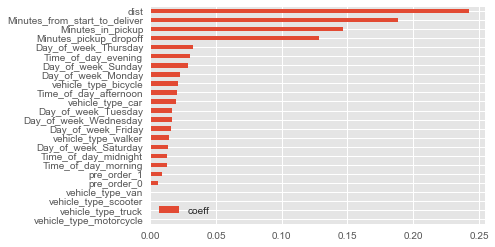

In [95]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.rcParams["figure.figsize"] = (18,20)
plt.show()